In [1]:
from shor_qiskit import Shor
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import math

### Example 1: Factorize 15

In [2]:
factor15 = Shor(15, 7)
print(factor15)

Factorizing 15 with the base number 7 and 4 phase qubits.


#### Building blocks of Shor's factoring algorithm

1. **Adder gate $\phi$ ADD(a)**:   $\ket{\phi(b)}$ $\rightarrow$  $\ket{\phi(a+b)}$
2. **Modular adder gate  $\phi$ ADD(a) mod N**: $\ket{\phi(b)}$ $\rightarrow$ $\ket{\phi(a+b \mod N)}$
3. **Controlled multiplier gate CMULT(a) mod N**: $\ket{x}\ket{b}$ $\rightarrow$ $\ket{x}\ket{b+ax \mod N}$
4. **$U_{a}$ gate**:  $\ket{x}\ket{0}$ $\rightarrow$ $\ket{ax \mod N}\ket{0}$

##### 1. $\phi$ ADD(a) (Draper QFT adder)
The Draper QFT adder utilizes phase shift operators to perform addition in the Fourier basis.

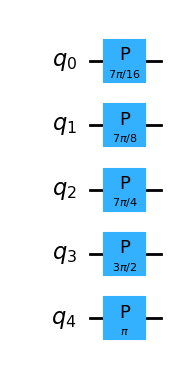

In [3]:
a = 7
N = 15
n = math.floor(math.log2(N)) + 1
phi_add = factor15.phi_ADD(a)
circ = QuantumCircuit(n + 1)
circ.append(phi_add, range(n + 1))
circ.decompose().draw("mpl")

##### 2. $\phi$ ADD(a) mod N 
The modular adder gate considers two scenarios—(1) $a+b > N$ and (2) $a+b < N$—by using an ancilla qubit. The ancilla qubit determines whether the inverse $\phi$ ADD(N) should be applied to $\ket{\phi(a+b)}$. The procedure is completed by uncomputing the ancilla qubit.

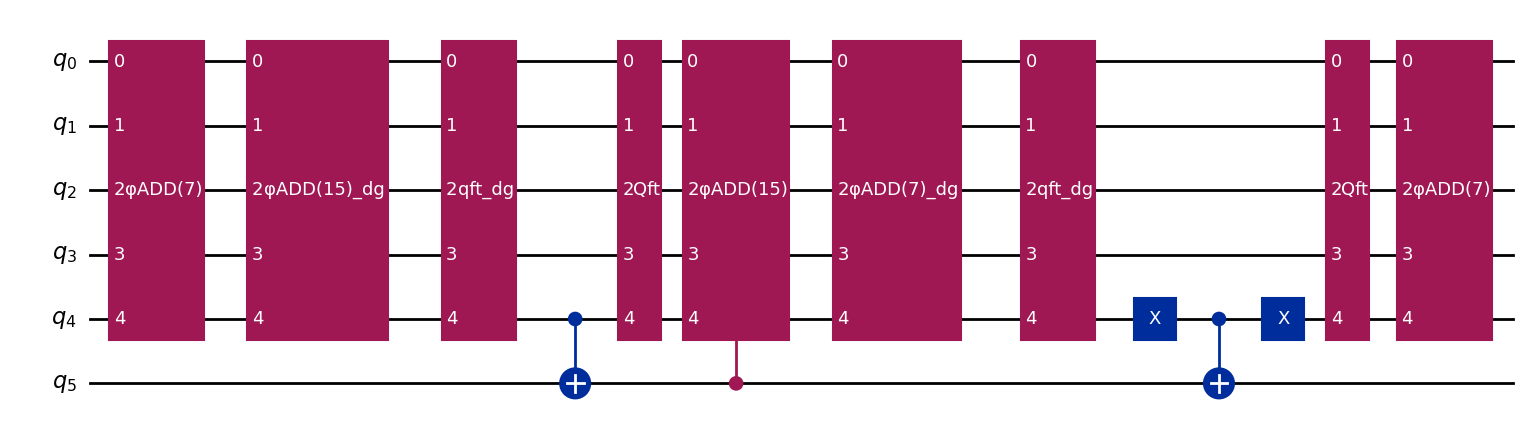

In [4]:
modular_add = factor15.modular_adder(a)
circ = QuantumCircuit(n + 2)
circ.append(modular_add, range(n + 2))
circ.decompose().draw("mpl")

##### 3. CMULT(a) mod N
The controlled-multiplier gate consists of a series of  $\phi$ ADD($a \cdot 2^i$) mod N gates, where $i = 1,\dots,n-1$. The input constants for the modular adder gates are given by $a \cdot 2^i \bmod N$.

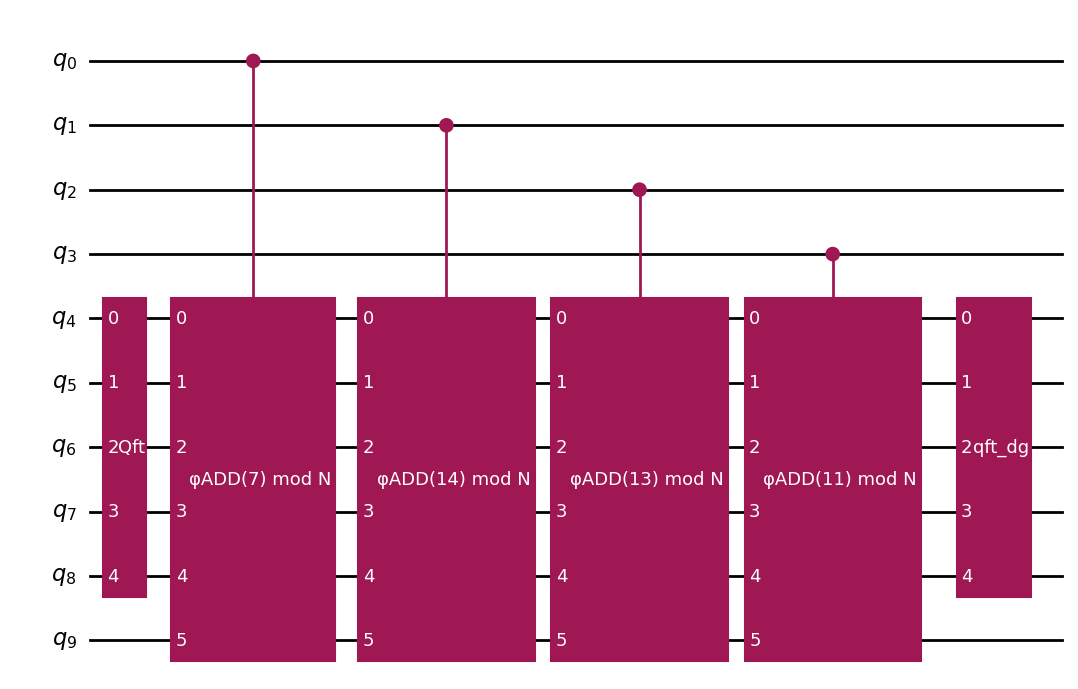

In [5]:
cmult = factor15.CMULT(a)
circ = QuantumCircuit(2 * n + 2)
circ.append(cmult, range(2 * n + 2))
circ.decompose().draw("mpl")

##### 4. $U_a$
The $U_a$ gate is composed of a CMULT(a) mod N gate, followed by a series of swap gates and the inverse CMULT($ a^{-1}$) mod N gate, where $a^{-1}$ is the modular multiplicative inverse of $a$ satisfying $a \cdot a^{-1} \bmod N = 1$.

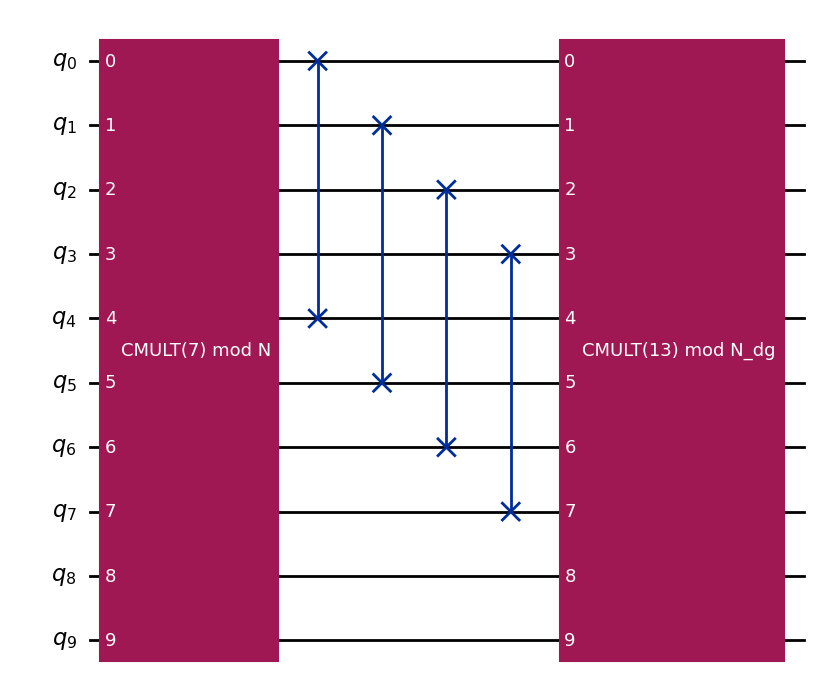

In [6]:
ua = factor15.Uy(a)
circ = QuantumCircuit(2 * n + 2)
circ.append(ua, range(2 * n + 2))
circ.decompose().draw("mpl")

##### 5. Shor's algorithm circuit
The Shor’s algorithm circuit is implemented as a Quantum Phase Estimation (QPE) circuit with the unitary operator $U = U_a$

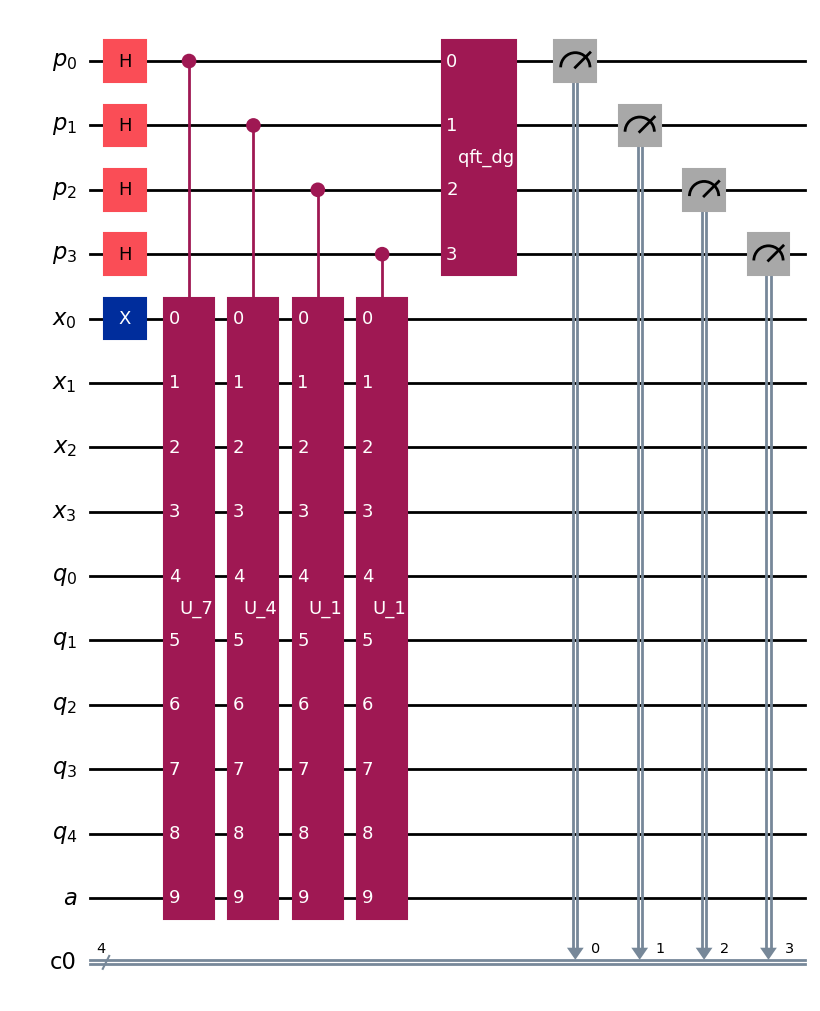

In [4]:
circ = factor15.circuit()
circ.draw("mpl")

##### 6. Collect measurement results
The output of Shor’s algorithm consists of phases of the form $\frac{s}{r}$, where $s = 0, 1, \dots, r-1$ and $r$ is the period we seek, satisfying $a^r \bmod N = 1$.

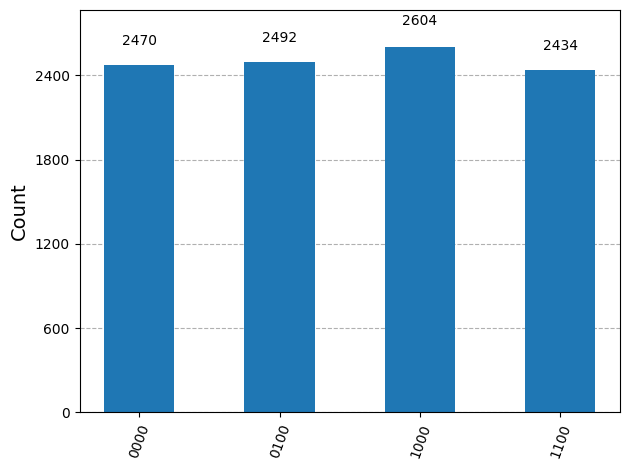

In [5]:
results = factor15.run_circuit(shots=10000)
plot_histogram(results)

##### 7. Post-processing to obtain the factors

In [ ]:
f15_1, f15_2 = factor15.factorize(results)

Selected period p = 4
15 = 3 * 5


### Example 2: Factorize 21

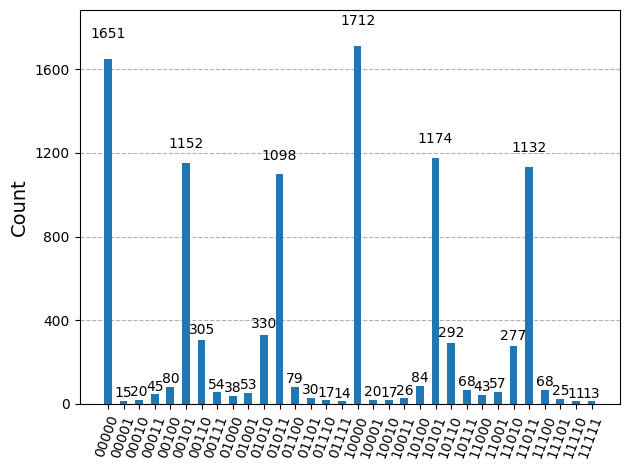

In [ ]:
factor21 = Shor(21, 2)
results = factor21.run_circuit()
plot_histogram(results)

In [ ]:
f21_1, f21_2 = factor21.factorize(results)

Selected period p = 6
21 = 3 * 7


### Example 3: Factorize 63

In [4]:
factor63 = Shor(63, 5)
factor63.factorize()

Selected period p = 6
63 = 3 * 21


(3, 21)

### Example 4: Factorize 123

In [5]:
factor123 = Shor(123, 7)
factor123.factorize()

No valid r. Try larger shots, more phase qubits, or new 'a'.


If the chosen `a` does not work, we can set a new value and try again.

In [6]:
factor123.set_a(2)  # set a new a
factor123.factorize()

Selected period p = 20
123 = 3 * 41


(3, 41)